In [1]:
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import cv2
from os import getcwd

In [2]:
from sklearn.manifold import TSNE

In [3]:
import utils
reload(utils)

<module 'utils' from 'C:\\Users\\Smit\\ds5230_2020_project\\utils.py'>

In [4]:
project_path = getcwd()
pickle_path = ".\\pickles\\"

# Loading flatten images

In [7]:
images = utils.open_pickle(file = pickle_path + "flattened_images")
images = images/255.0 # normalizing image
images_idx = utils.open_pickle(file = pickle_path + "flattened_image_names")

In [8]:
print("Original flatten image shape before using PCA transformation:", images[0].shape[0])

Original flatten image shape before using PCA transformation: 14400


# Loading PCA object

In [9]:
MAX_PCA_COMPONENTS = utils.open_pickle(pickle_path + "max_pca_components_" + str(145))
pca_object = utils.open_pickle(pickle_path + "pca_obj_components_" + str(MAX_PCA_COMPONENTS))

Transforming image into lower dimension

In [10]:
transformed_images = pca_object.transform(images)

In [11]:
transformed_images.shape

(10796, 145)

# Performing T-SNE on PCA transfomed images

In [13]:
%%time
tsne = TSNE(n_components = 2,
            verbose= 1,
            n_iter=2000,
            n_iter_without_progress=100,
            random_state=40,
            perplexity=25)
tsne_results = tsne.fit_transform(transformed_images)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10796 samples in 0.120s...
[t-SNE] Computed neighbors for 10796 samples in 19.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10796
[t-SNE] Computed conditional probabilities for sample 2000 / 10796
[t-SNE] Computed conditional probabilities for sample 3000 / 10796
[t-SNE] Computed conditional probabilities for sample 4000 / 10796
[t-SNE] Computed conditional probabilities for sample 5000 / 10796
[t-SNE] Computed conditional probabilities for sample 6000 / 10796
[t-SNE] Computed conditional probabilities for sample 7000 / 10796
[t-SNE] Computed conditional probabilities for sample 8000 / 10796
[t-SNE] Computed conditional probabilities for sample 9000 / 10796
[t-SNE] Computed conditional probabilities for sample 10000 / 10796
[t-SNE] Computed conditional probabilities for sample 10796 / 10796
[t-SNE] Mean sigma: 3.760079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.692108
[t-SNE] KL

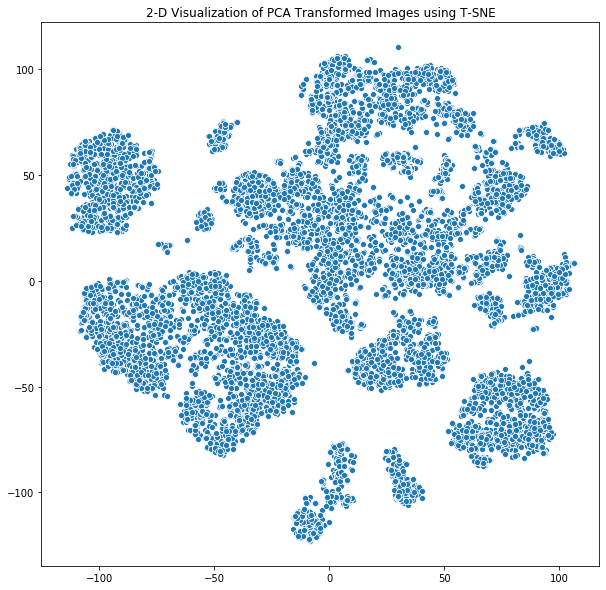

In [14]:
plt.subplots(figsize = (10, 10))
sns.scatterplot(x = tsne_results[:,0], y = tsne_results[:,1])
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE"
plt.title(fig_name)
plt.savefig(".\\Outputs\\" + fig_name + ".png")

Here we can identify 10-12 clusters

# Getting KMeans Fit

In [16]:
N_CLUSTERS = 12
kmeans_fit = utils.open_pickle(pickle_path + "KMeans_clusters_" + str(N_CLUSTERS))

In [17]:
transformed_images_clusters = kmeans_fit.predict(transformed_images)

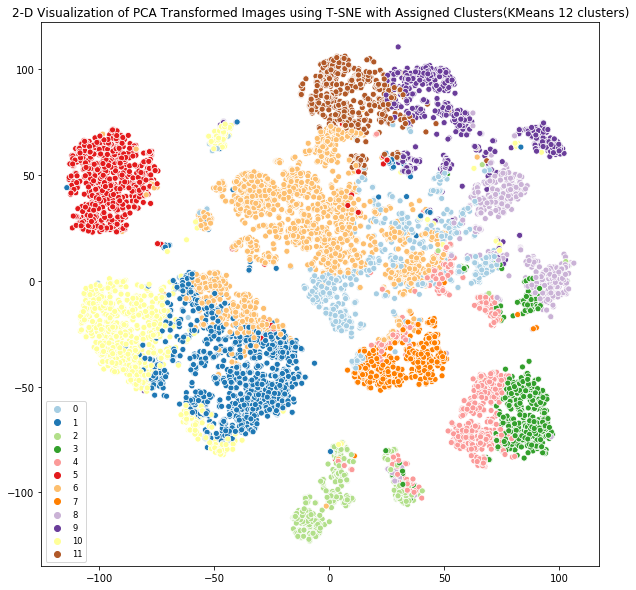

In [18]:
plt.subplots(figsize = (10, 10))

palette = sns.color_palette("Paired", N_CLUSTERS)
sns.scatterplot(x = tsne_results[:,0], 
                y = tsne_results[:,1], 
                hue=transformed_images_clusters,
                legend='full', 
                palette=palette)
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE with Assigned Clusters(KMeans 12 clusters)"
plt.title(fig_name)
plt.legend(fontsize="small", loc="lower left")
plt.savefig(".\\Outputs\\" + fig_name + ".png")

# Comparing Predicted Clusters (Category) with actual categories

In [19]:
styles = pd.read_csv('.\\styles.csv', error_bad_lines = False)
sub_categories = [styles[styles['id']==i]['subCategory'].values[0] for i in images_idx]
del styles

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

Text(0.5, 1, '2-D Visualization of PCA Transformed Images using T-SNE with Actual Product Sub-Categories')

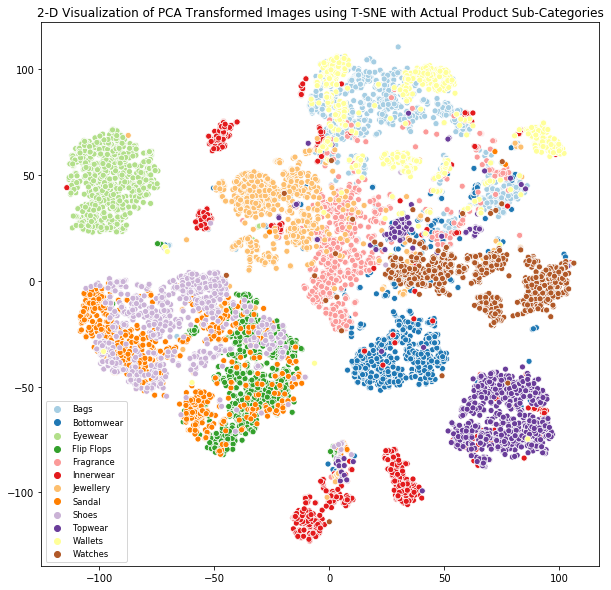

In [20]:
plt.subplots(figsize = (10, 10))
sns.scatterplot(x = tsne_results[:,0], 
                y = tsne_results[:,1],
                hue = sub_categories, 
                legend='full', 
                palette=palette)
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE with Actual Product Sub-Categories"
plt.title(fig_name)
plt.legend(fontsize="small", loc="lower left")
plt.savefig(".\\Outputs\\" + fig_name + ".png")
plt.title(fig_name)

# Getting GMM Fit

In [21]:
N_COMPONENTS = 12
gmm_fit = utils.open_pickle(pickle_path + "GMM_components_" + str(N_COMPONENTS))

In [22]:
gmm_images_labels = gmm_fit.predict(transformed_images)

In [23]:
gmm_images_labels

array([ 8,  5, 10, ..., 10,  3,  3], dtype=int64)

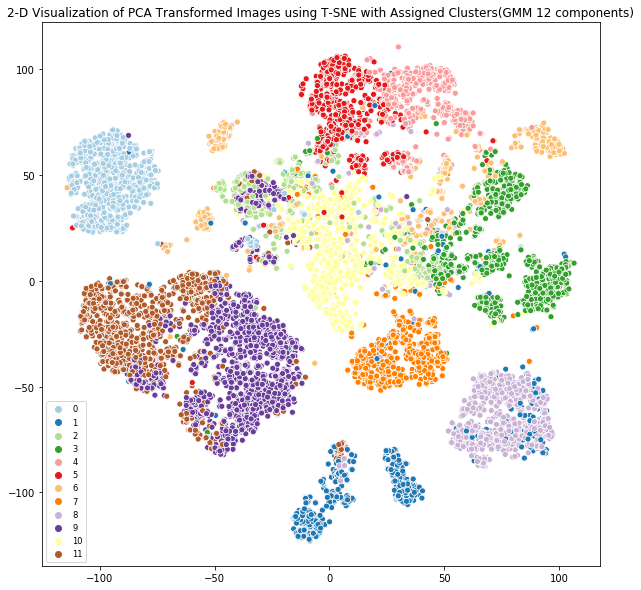

In [24]:
plt.subplots(figsize = (10, 10))

palette = sns.color_palette("Paired", N_CLUSTERS)
sns.scatterplot(x = tsne_results[:,0], 
                y = tsne_results[:,1], 
                hue=gmm_images_labels,
                legend='full', 
                palette=palette)
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE with Assigned Clusters(GMM 12 components)"
plt.title(fig_name)
plt.legend(fontsize="small", loc="lower left")
plt.savefig(".\\Outputs\\" + fig_name + ".png")